# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import json
import pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [74]:
#create lists to store values for Lat, lng, max temp, humidity, cloudiness, wind speed, country, date
#cities stored in list above. 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
#add only the cities that can be located to this list for dictionary/dataframe
valid_city = []

#set initial counter values
set = 1 
i = 0

#Create for loop for cities in list and use i variable and enumerate to create count
for city in cities:
    #every 50 we reset the i (city number) counter and set counter
    if i == 50:
        set = set + 1
        i = 0 
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    #print city not found if there isn't one based on the 404 error code
    if weather_response.status_code == 404:
        print("City not found. Skipping...")
    else:
        # Get the temperature from the response
        print(f"Processing Record {i} of Set {set} | {city}.")
        
        #append lists with the corresponding json values for creating dictionary/dataframe.
        valid_city.append(city)
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(pytemperature.k2f(weather_json["main"]["temp_max"]))
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
    
    #after we complete each record, it increments counter to next record (city)
    i = i + 1 
    #print(f"The weather API responded with: {weather_response.status_code}.")



Processing Record 0 of Set 1 | hermanus.
Processing Record 1 of Set 1 | ponta do sol.
Processing Record 2 of Set 1 | flinders.
Processing Record 3 of Set 1 | asau.
Processing Record 4 of Set 1 | huanren.
Processing Record 5 of Set 1 | busselton.
Processing Record 6 of Set 1 | yellowknife.
Processing Record 7 of Set 1 | tuatapere.
Processing Record 8 of Set 1 | hambantota.
Processing Record 9 of Set 1 | fare.
Processing Record 10 of Set 1 | mahebourg.
Processing Record 11 of Set 1 | klaksvik.
Processing Record 12 of Set 1 | matara.
Processing Record 13 of Set 1 | kitimat.
Processing Record 14 of Set 1 | punta arenas.
Processing Record 15 of Set 1 | tilichiki.
Processing Record 16 of Set 1 | castro.
Processing Record 17 of Set 1 | cidreira.
Processing Record 18 of Set 1 | kodiak.
Processing Record 19 of Set 1 | griffith.
Processing Record 20 of Set 1 | butaritari.
City not found. Skipping...
Processing Record 22 of Set 1 | tobermory.
Processing Record 23 of Set 1 | chokurdakh.
Processing

Processing Record 49 of Set 4 | muros.
Processing Record 0 of Set 5 | atikokan.
Processing Record 1 of Set 5 | vaitape.
Processing Record 2 of Set 5 | puerto guzman.
Processing Record 3 of Set 5 | qianguo.
Processing Record 4 of Set 5 | tshane.
Processing Record 5 of Set 5 | ust-nera.
City not found. Skipping...
Processing Record 7 of Set 5 | singaparna.
Processing Record 8 of Set 5 | puerto madryn.
Processing Record 9 of Set 5 | megion.
Processing Record 10 of Set 5 | zhaotong.
Processing Record 11 of Set 5 | salalah.
City not found. Skipping...
Processing Record 13 of Set 5 | sao filipe.
Processing Record 14 of Set 5 | kavieng.
Processing Record 15 of Set 5 | atar.
Processing Record 16 of Set 5 | praia da vitoria.
Processing Record 17 of Set 5 | dolores.
Processing Record 18 of Set 5 | salina.
Processing Record 19 of Set 5 | ancud.
Processing Record 20 of Set 5 | gornopravdinsk.
Processing Record 21 of Set 5 | javanrud.
Processing Record 22 of Set 5 | labuhan.
Processing Record 23 of

Processing Record 2 of Set 9 | coquimbo.
City not found. Skipping...
Processing Record 4 of Set 9 | pirae.
Processing Record 5 of Set 9 | jinchang.
Processing Record 6 of Set 9 | watsa.
Processing Record 7 of Set 9 | aklavik.
Processing Record 8 of Set 9 | port augusta.
Processing Record 9 of Set 9 | carballo.
Processing Record 10 of Set 9 | maragogi.
Processing Record 11 of Set 9 | lynn haven.
City not found. Skipping...
Processing Record 13 of Set 9 | namibe.
Processing Record 14 of Set 9 | vila franca do campo.
City not found. Skipping...
Processing Record 16 of Set 9 | genhe.
Processing Record 17 of Set 9 | urengoy.
Processing Record 18 of Set 9 | sabang.
Processing Record 19 of Set 9 | hovd.
City not found. Skipping...
Processing Record 21 of Set 9 | mangrol.
Processing Record 22 of Set 9 | luanda.
Processing Record 23 of Set 9 | la rioja.
Processing Record 24 of Set 9 | hirara.
Processing Record 25 of Set 9 | ninh binh.
Processing Record 26 of Set 9 | ahipara.
Processing Record 2

In [72]:
!pip install pytemperature

  Created wheel for pytemperature: filename=pytemperature-1.0-py3-none-any.whl size=1939 sha256=320b20da65cdf1ed6f457d6ec19cd2da920288c713b42403887b7e72be5e6ad0
  Stored in directory: /Users/KaseyWilson/Library/Caches/pip/wheels/ee/66/d3/916f539ba4d1d77ff0afff67f539353b3a5c49d0f5f0b8b6c7
Successfully built pytemperature


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -2.9517,
        "lat": 14.9951
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 295.27,
        "feels_like": 291.76,
        "temp_min": 295.27,
        "temp_max": 295.27,
        "pressure": 1012,
        "humidity": 19,
        "sea_level": 1012,
        "grnd_level": 977
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.68,
        "deg": 116
    },
    "clouds": {
        "all": 80
    },
    "dt": 1612483110,
    "sys": {
        "country": "ML",
        "sunrise": 1612420797,
        "sunset": 1612462291
    },
    "timezone": 0,
    "id": 2458334,
    "name": "Douentza",
    "cod": 200
}


In [125]:
#create a dictionary for establishing dataframe
weather_dict = {
    "City": valid_city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}

#convert data to dataframe
city_data = pd.DataFrame(weather_dict)
city_data

#write to text file "cities.csv" stored in output_data folder
city_data.to_csv(("output_data/cities.csv"))

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,63.98,91,5,3.53,ZA,1612489893
1,ponta do sol,32.6667,-17.1000,48.97,67,83,1.34,PT,1612490167
2,flinders,-34.5833,150.8552,83.98,70,13,3.13,AU,1612490226
3,asau,46.4333,26.4000,37.38,87,40,3.09,RO,1612490557
4,huanren,41.2647,125.3667,23.18,93,91,3.22,CN,1612490557


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
#Inspect the data
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.242150,19.702974,50.057151,74.076225,52.791289,3.628857,1.612490e+09
std,32.521387,91.921491,31.176100,18.964694,40.044180,2.660723,2.291399e+02
min,-54.800000,-175.200000,-43.620000,18.000000,0.000000,0.210000,1.612490e+09
25%,-6.302550,-64.707400,34.160000,65.000000,10.000000,1.540000,1.612490e+09
50%,23.666700,24.800000,60.690000,78.000000,54.000000,3.090000,1.612491e+09
75%,48.101150,103.625700,74.350000,88.000000,92.000000,4.920000,1.612491e+09
max,78.218600,179.316700,94.980000,100.000000,100.000000,16.000000,1.612491e+09


In [80]:
#check for cities with humidity over 100
city_loc = city_data.loc[city_data["Humidity"] > 100]
city_loc

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [81]:
#Create new dataframe from city_data  to drop all humidity outliers by index
clean_city = city_data

In [82]:
#determine quartiles and iqr 
q1 = clean_city["Humidity"].quantile(0.25)
q3 = clean_city["Humidity"].quantile(0.75)
iqr = q3 - q1

#determining potential outliers
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
#determine outliers using upper and lower bounds
outlier=clean_city.loc[(clean_city["Humidity"]>upper_bound)|(clean_city["Humidity"]<lower_bound)]
    
#print(outlier)
if len(outlier)>0: print(outlier)
    

               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
27            minna   9.6139    6.5569     78.78        18           0   
51            arlit  18.7369    7.3853     62.49        27          99   
69   cabo san lucas  22.8909 -109.9124     78.78        29          40   
75             yaan   7.3833    8.5667     74.91        20           0   
161   doctor arroyo  23.6667 -100.1833     67.17        22           0   
172    birnin kebbi  12.4539    4.1975     71.94        21           0   
198   puerto madryn -42.7692  -65.0385     83.15        25           0   
239         sikasso  10.9167   -7.0000     72.01        21           0   
242           birao  10.2849   22.7882     74.14        20          53   
257         biltine  14.5333   20.9167     64.42        27           0   
270           asosa  10.0667   34.5333     63.55        29          22   
280           ndele   8.4109   20.6473     75.14        20           8   
289            sire  12.9299    5.2043

In [83]:
#select all the data that is not greater than the upper bound and not lower than the lower bound using "not"
# "not" symbol (~)
clean_data=clean_city.loc[~((clean_city["Humidity"]>upper_bound)|(clean_city["Humidity"]<lower_bound))]
clean_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,63.98,91,5,3.53,ZA,1612489893
1,ponta do sol,32.6667,-17.1000,48.97,67,83,1.34,PT,1612490167
2,flinders,-34.5833,150.8552,83.98,70,13,3.13,AU,1612490226
3,asau,46.4333,26.4000,37.38,87,40,3.09,RO,1612490557
4,huanren,41.2647,125.3667,23.18,93,91,3.22,CN,1612490557
...,...,...,...,...,...,...,...,...,...
544,cabatuan,10.8794,122.4860,82.02,77,82,6.73,PH,1612490643
545,tokur,53.1333,132.9000,-24.67,86,91,1.64,RU,1612490643
546,kondinskoye,59.6481,67.4100,12.09,96,99,2.94,RU,1612490644
548,porbandar,21.6422,69.6093,58.98,77,0,4.12,IN,1612490644


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

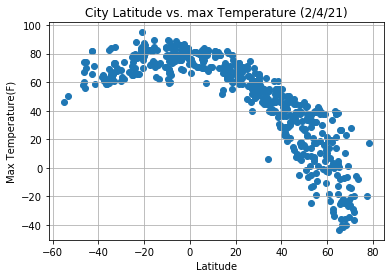

<Figure size 432x288 with 0 Axes>

In [97]:
plt.scatter(clean_data["Lat"], clean_data["Max Temp"])

plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. max Temperature (2/4/21)")
plt.grid()
fig = plt.figure()
fig.savefig("WeatherPy_Images/lat_vs_temp.png")

#### The city latitude vs. max temperature shows how temperature trends the further you get from the equator. This figure demonstrates that as you get further away from the equator, the max temperature decreases. In the Southern Hemisphere (latitude below 0) the max temperature does not have as steep of a drop off as is seen in the Northern Hemisphere.

## Latitude vs. Humidity Plot

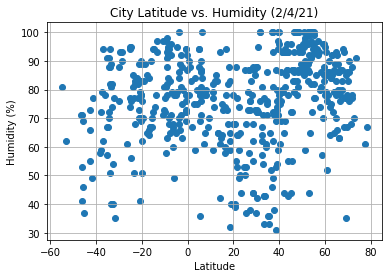

<Figure size 432x288 with 0 Axes>

In [98]:
plt.scatter(clean_data["Lat"], clean_data["Humidity"])

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2/4/21)")
plt.grid()
fig = plt.figure()
fig.savefig("WeatherPy_Images/lat_vs_humidity.png")

#### The city latitude vs. Humidity plot depicts how humidity varies as latitude changes. From this scatter plot we can see that there is not a significant correlation between latitude and humidity. 

## Latitude vs. Cloudiness Plot

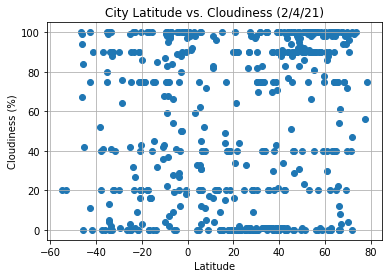

<Figure size 432x288 with 0 Axes>

In [99]:
plt.scatter(clean_data["Lat"], clean_data["Cloudiness"])

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2/4/21)")
plt.grid()
fig = plt.figure()
fig.savefig("WeatherPy_Images/lat_vs_cloudiness.png")

#### The latitude vs. Cloudiness plot demonstrates the data points for each city and cloudiness % vs. how close it is to the equator (latitude). The plot does not demonstrate a correlation between these two data points. Cloudiness levels appear to be independt of latitude. 

## Latitude vs. Wind Speed Plot

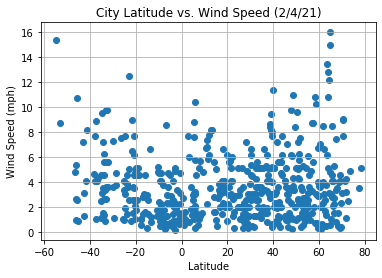

<Figure size 432x288 with 0 Axes>

In [100]:
plt.scatter(clean_data["Lat"], clean_data["Wind Speed"])

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2/4/21)")
plt.grid()
fig = plt.figure()
fig.savefig("WeatherPy_Images/lat_vs_wind.png")

#### The latitude vs. Wind Speed plot demonstrates the data points for each city and wind speed vs. how close it is to the equator (latitude). The plot does not demonstrate a correlation between these two data points. Wind Speed appear to be independt of latitude. 

## Linear Regression

In [104]:
#Create dataframe showing only data points in the Northern Hemisphere
northern = clean_data.loc[clean_city["Lat"]>0]
northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ponta do sol,32.6667,-17.1000,48.97,67,83,1.34,PT,1612490167
3,asau,46.4333,26.4000,37.38,87,40,3.09,RO,1612490557
4,huanren,41.2647,125.3667,23.18,93,91,3.22,CN,1612490557
6,yellowknife,62.4560,-114.3525,-29.02,75,1,3.09,CA,1612490178
8,hambantota,6.1241,81.1185,69.78,100,40,1.54,LK,1612490557


In [105]:
#Create dataframe showing only data points in the Southern Hemisphere
southern = clean_data.loc[clean_city["Lat"]<0]
southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,63.98,91,5,3.53,ZA,1612489893
2,flinders,-34.5833,150.8552,83.98,70,13,3.13,AU,1612490226
5,busselton,-33.6500,115.3333,65.98,40,2,0.89,AU,1612490157
7,tuatapere,-46.1333,167.6833,67.17,53,94,2.71,NZ,1612490267
9,fare,-16.7000,-151.0167,82.07,64,0,2.84,PF,1612490291


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7684103416721139


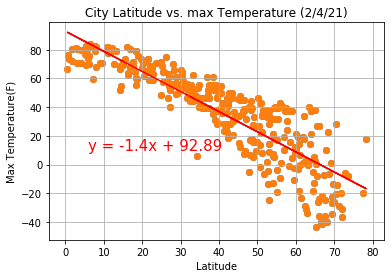

<Figure size 432x288 with 0 Axes>

In [114]:
# Print out the r-squared value along with the plot.
x_values = northern["Lat"]
y_values = northern["Max Temp"]
plt.scatter(northern["Lat"], northern["Max Temp"])
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. max Temperature (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/northern_lat_vs_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.29641646641560987


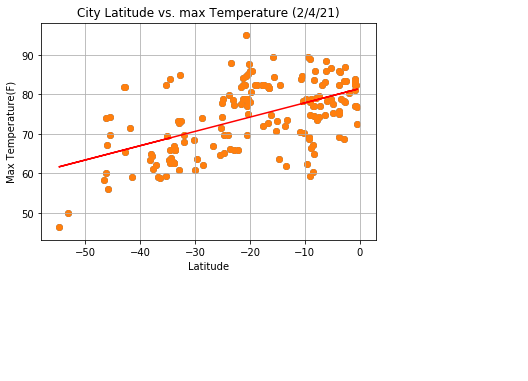

<Figure size 432x288 with 0 Axes>

In [115]:
# Print out the r-squared value along with the plot.
x_values = southern["Lat"]
y_values = southern["Max Temp"]
plt.scatter(southern["Lat"], southern["Max Temp"])
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. max Temperature (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/southern_lat_vs_temp.png")

#### The plots and regression for both Northern Hemisphere and Southern Hemisphere for latitude vs. max temperature demonstrate a correlation between these two factors. Both depict that as latitude increases and you get further from the equater, the lower the max temperature is. Conversely, the closer you get to the equator, the higher the max temperature tends to be. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07163325066831537


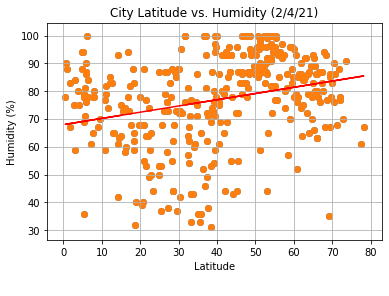

<Figure size 432x288 with 0 Axes>

In [116]:
# Print out the r-squared value along with the plot.
x_values = northern["Lat"]
y_values = northern["Humidity"]
plt.scatter(northern["Lat"], northern["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/northern_lat_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10667040457635356


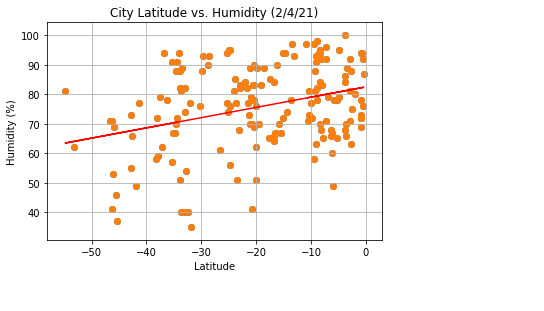

<Figure size 432x288 with 0 Axes>

In [117]:
# Print out the r-squared value along with the plot.
x_values = southern["Lat"]
y_values = southern["Humidity"]
plt.scatter(southern["Lat"], southern["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/southern_lat_vs_humidity.png")

#### The city latitude vs. humidity plots for both Northern and Southern Hemispheres depicts no statistically significant correlation. With an r-value of close to 0 for each humidity level seems to be independ of proximity to the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08987956231674553


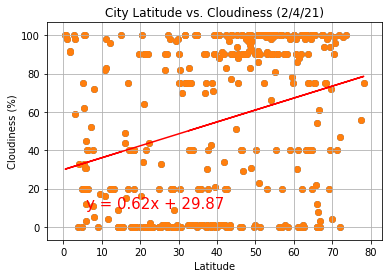

<Figure size 432x288 with 0 Axes>

In [118]:
# Print out the r-squared value along with the plot.
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
plt.scatter(northern["Lat"], northern["Cloudiness"])
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/northern_lat_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03170479036096767


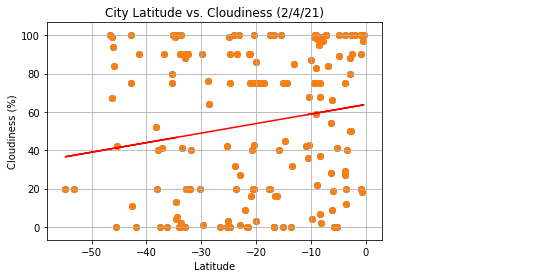

<Figure size 432x288 with 0 Axes>

In [119]:
# Print out the r-squared value along with the plot.
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
plt.scatter(southern["Lat"], southern["Cloudiness"])
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/southern_lat_vs_cloudiness.png")

#### The city latitude vs. cloudiness plots for both Northern and Southern Hemispheres depicts no statistically significant correlation. With an r-value of close to 0 for each cloudiness level seems to be independ of proximity to the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010952650147088279


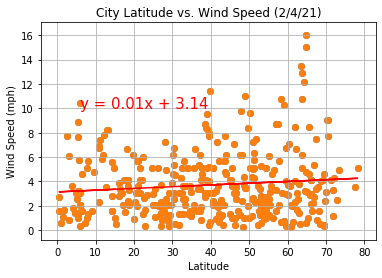

<Figure size 432x288 with 0 Axes>

In [122]:
# Print out the r-squared value along with the plot.
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
plt.scatter(northern["Lat"], northern["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/northern_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2002410810416782


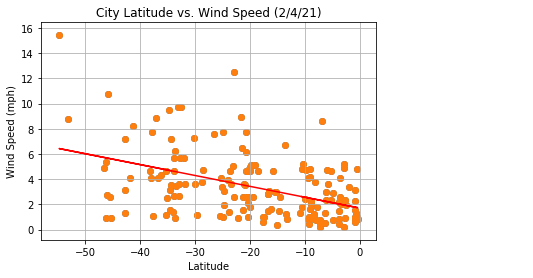

<Figure size 432x288 with 0 Axes>

In [121]:
# Print out the r-squared value along with the plot.
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
plt.scatter(southern["Lat"], southern["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2/4/21)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

fig = plt.figure()
fig.savefig("WeatherPy_Images/southern_lat_vs_wind.png")

#### The city latitude vs. wind speed plots for both Northern and Southern Hemispheres depicts no statistically significant correlation. With an r-value of close to 0 for each cloudiness level seems to be independ of proximity to the equator. 